In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emission import *


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
# Neutrino energies [MeV]
E = np.linspace(0, 60, 1000)

In [4]:
#Function for plotting the spectra
def plot_spectrum(E, L = 1e53, stage = 'emission', hierarchy = 'normal',
                yscale = 'linear', phi = 0):
    fig, ax = plt.subplots(figsize=(10,8))
    if stage == 'production':
        plt.plot(E, produced_spectrum(E, 'nu_e', L), color = 'crimson',
                label = r'$\nu_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nubar_e', L), color = 'teal',
                ls = '--', label = r'$\overline{\nu}_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nu_x', L), color = 'indigo',
                ls = '-.', label = r'$\nu_x$', lw = 2)
    elif stage == 'emission':
        plt.plot(E, emitted_spectrum(E, 'nu_e', L, hierarchy, phi = phi), color = 'crimson',
                label = r'$\nu_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nubar_e', L, hierarchy, phi = phi), color = 'teal',
                ls = '--', label = r'$\overline{\nu}_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_x', L, hierarchy, phi = phi), color = 'indigo',
                ls = '-.', label = r'$\nu_x$', lw = 2)
    elif stage == 'both':
        plt.plot(E, produced_spectrum(E, 'nu_e', L), color = 'crimson',
                label = r'Produced $\nu_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nubar_e', L), color = 'teal',
                label = r'Produced $\overline{\nu}_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nu_x', L), color = 'indigo',
                label = r'Produced $\nu_x$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_e', L, hierarchy, phi = phi), color = 'crimson',
                ls = '--', label = r'Emitted $\nu_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nubar_e', L, hierarchy, phi = phi), color = 'teal',
                ls = '--', label = r'Emitted $\overline{\nu}_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_x', L, hierarchy, phi = phi), color = 'indigo',
                ls = '--', label = r'Emitted $\nu_x$', lw = 2)
    else:
        raise ValueError('Invalid stage or hierarchy. Please choose between "normal" or\
                        "inverted" for hierarchy and "production" or "emission" for stage. \
                        If you want to plot the spectra in both stages use "both".')
    if stage == 'both':
        plt.legend(fontsize = 16, ncol = 2, loc = 'upper right')
    else:
        plt.legend(fontsize = 16, ncol = 1, loc = 'upper right')
    plt.title('Time-integrated fluxes of supernova neutrinos in {} mass hierarchy'.format(hierarchy),
            fontsize = 24, pad = 18)
    plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
    plt.ylabel('Time-integrated flux', fontsize = 20)
    plt.yscale(yscale)
    plt.xlim(0, 60)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    ax.yaxis.offsetText.set_fontsize(14)
    if yscale == 'linear':
        plt.ylim(0)
    plt.tight_layout()
    plt.show()

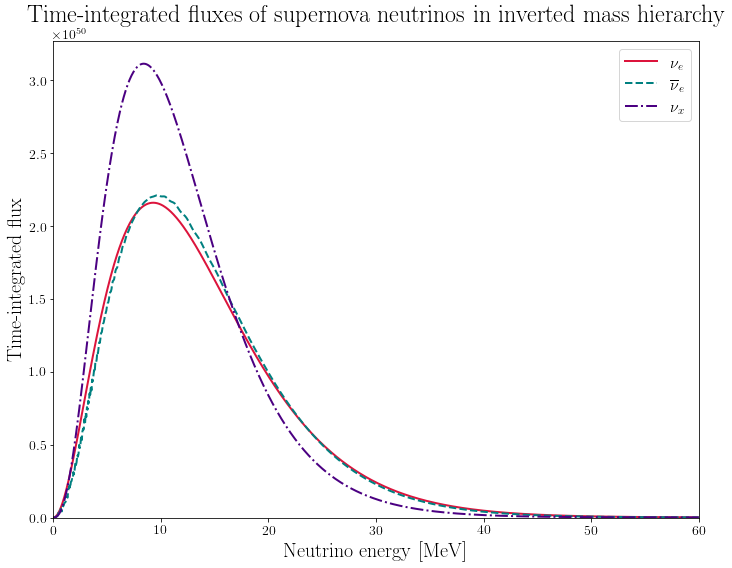

In [5]:
# Calling the function to plot spectra using normal mass hierarchy
# and 1.5e53 ergs of total luminosity
plot_spectrum(E, 5e52, 'emission', 'inverted', yscale='linear', phi = np.pi/2)

(5.0, 15.0)

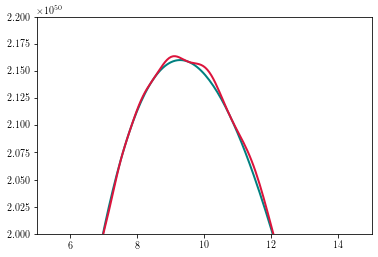

In [10]:
plt.plot(E, emitted_spectrum(E, 'nubar_e', 5e52, 'normal', phi = 0), color = 'teal',
         label = r'$\overline{\nu}_e$', lw = 2)
plt.plot(E, emitted_spectrum(E, 'nubar_e', 5e52, 'normal', phi = np.pi/4), color = 'crimson',
         label = r'$\overline{\nu}_e$', lw = 2)
plt.ylim(2e50, 2.2e50)
plt.xlim(5, 15)